# Intro to Neural Networks
by the Western AI Collective

# Packages

- **numpy** for arrays and linear algebra
- **matplotlib** for plotting data and showing images
- **tensorflow** for building our neural networks
- **tensorflow.keras** makes it easier for us to build neural networks
- **sklearn** for some data handling convenience

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Tensorflow
import tensorflow as tf
# Keras
from tensorflow import keras

import sklearn

import random

In [2]:
DATA_PATH = './data/'
# DATA_PATH = 'https://www.dropbox.com/sh/8f3n880duw68rmv/AADqsHCqKfGPoa4dMIfuel_da?dl=1'

# Artificial Neurons
Artificial neurons are the most fundamental building block of neural networks. They're actually modeled based on how neurons in the brain are thought to work.

They're extremely simple by themselves, but come together (sometimes in the thousands) to build complex networks able to understand human speech.

## Structure
<img style="height: 150px; margin-left: 0" src="images/neuron.png">
<img style="height: 150px; margin-left: 0" src="images/neuron-thresh.jpeg">

### Input: <i>X<sub>n</sub></i>
Also known as our x-values/independent variables/features.

### Weights: <i>W<sub>n</sub></i>
Used by the neuron to apply _importance_ or extra _weight_ to variables.

Ex. if we want to predict passing or failing for students and we know _how much sleep they get_, _how much they study_, and _how tall they are_, we're probably* going to weigh the amount of sleep and studying they do more in the calculation.

### Sum
Add all the weighted inputs.

### Activation Function
Different activation functions are used for different use cases.

_Sigmoid/ReLU_: for when our outputs are continuous.

_Threshold_: for when we need a yes or no.

<img style="height: 200px; margin-left: 0" src="images/neuron-anim.gif">

### The Single Neuron _Network_

Next we'll build a single neuron _network_.

When you create an new model, Keras randomly initializes our weights. Remember, it doesn't _matter*_ what our weights are at this point, because we are going to adjust them to get the output we want.

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential([
    Dense(1, input_shape=(1,)),
    Activation('sigmoid'),
])

print(model.layers[0].get_weights())

[array([[-1.2593038]], dtype=float32), array([0.], dtype=float32)]


Now let's run a prediction and see what we get.

In [4]:
model.predict([1])

array([[0.22109374]], dtype=float32)

In [5]:
del model

# Activations
Different activation functions have different properties. Here we'll compare different functions.

## tanh
<img style="height: 350px; margin-left: 0" src="images/tanh.png">

## Sigmoid
<img style="height: 350px; margin-left: 0" src="images/sigmoid.png">

## RELU
<img style="height: 350px; margin-left: 0" src="images/relu.png">

## Softmax function
<img style="height: 200px; margin-left: 0" src="images/softmax.png">

Now we'll create a single neuron with a relu activation.

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential([
    Dense(1, input_shape=(1,)),
    Activation('relu'),
])

print(model.layers[0].get_weights())

[array([[-0.48813534]], dtype=float32), array([0.], dtype=float32)]


In [7]:
model.predict([1])

array([[0.]], dtype=float32)

In [8]:
del model

# Layers
To put these nodes together we construct a _network_. All a network is in this case is a collection of interconnected neurons.

All these neurons work together to learn about our data and output what we want.

Here's what a very simple network looks like:

<img style="height: 200px; margin-left: 0" src="images/network-layers.png">

It's important to see why we have different layers.

## Input
First we have the input layer where we feed our data into.

## Hidden
Then we perform the computations through the neurons that we saw before. Here is where the _blackbox_ nature of neural networks comes in.

In here the network is working with features that it creates for itself and don't mean much to humans, but work together to give you the output you want.

## Output
then we have an output layer which gives us our prediction.

# Training Neural Networks

Neural networks are trained similarly the algorithms from our last lecture.

## Review of Supervised Learning
In this workshop we will only be talking about supervised learning.

### _Supervised_
This type of training means that we have features/inputs for which also have a label/desired output for.

A good analogy for this is math exam. You get the test sheet with questions and multiple choice answers, but there is also an answer key that contains the correct answers.

### _Learning_
A learning algorithm _teaches_ a model over time as it sees more data.

First we start with a _dumb_ model and see how it answers questions. Then we look at the correct answers and see how the model compares. Then we adjust the model slighty _(remember gradient descent)_ so that the model will answer closer to what we want with more confidence.

Using the same math analogy, you could see how this could work even with humans. For example, let's say you knew what numbers were, but not what a **_>_** and **_<_** were.

If I gave you a test containing:

| x<sub>1</sub> | x<sub>1</sub> |
| -----------   | -----------   |
|      0        |      8        |
|      3        |     -2        |
|      5        |     -8        |
|     10        |     11        |
|      2        |     -2        |

you could probably give me the answers to the test.

| x<sub>1</sub> | x<sub>1</sub> |      y        |
| -----------   | -----------   | -----------   |
|      0        |      8        |      <        |
|      3        |     -2        |      >        |
|      5        |     -8        |      >        |
|     10        |     11        |      <        |
|      2        |     -2        |      >        |

And if you couldn't give me the answers at first, you could look at the answers to the test and come up with some sort of mapping.

## Teaching a neuron
Let's actually use our neuron to learn about greater than and less than signs.

### Building the dataset
We need a large range of values with their paired sign.

Our x-values will be two integers and the y-values will be either a greater than or less than sign.

In [9]:
data_x = np.array([(random.randint(-25000, 25000), random.randint(-25000, 25000)) for i in range(50000)])

data_y = []
signs = ['<', '>']
for x1, x2 in data_x:
    data_y.append(int(x1>x2))
    
train_x = data_x[:800]
train_y = data_y[:800]
test_x = data_x[800:]
test_y = data_y[800:]

In [11]:
i = 300
print(train_x[i], train_y[i], signs[train_y[i]])

[ -456 -2004] 1 >


## Create the neuron

Just like before, we'll use a single neuron, now with two inputs and a sigmoid activation function.

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

gtlt_model = Sequential([
    Dense(1, kernel_initializer='uniform', input_shape=(2,)),
    Activation('sigmoid'),
])

print(gtlt_model.layers[0].get_weights())

gtlt_model.summary()

[array([[0.0360661 ],
       [0.03341894]], dtype=float32), array([0.], dtype=float32)]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 3         
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [13]:
gtlt_model.compile(
    optimizer='adam', 
    loss='mean_absolute_error',
    metrics=['accuracy']
)

In [14]:
gtlt_model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=50)

Train on 800 samples, validate on 49200 samples
Epoch 1/50
800/800 [==============================] - 0s 492us/step - loss: 0.4575 - acc: 0.5425 - val_loss: 0.3904 - val_acc: 0.6096
Epoch 2/50
800/800 [==============================] - 0s 356us/step - loss: 0.3646 - acc: 0.6350 - val_loss: 0.3223 - val_acc: 0.6776
Epoch 3/50
800/800 [==============================] - 0s 350us/step - loss: 0.3304 - acc: 0.6700 - val_loss: 0.2869 - val_acc: 0.7131
Epoch 4/50
800/800 [==============================] - 0s 344us/step - loss: 0.2938 - acc: 0.7063 - val_loss: 0.2635 - val_acc: 0.7364
Epoch 5/50
800/800 [==============================] - 0s 350us/step - loss: 0.2838 - acc: 0.7162 - val_loss: 0.2600 - val_acc: 0.7401
Epoch 6/50
800/800 [==============================] - 0s 448us/step - loss: 0.2645 - acc: 0.7350 - val_loss: 0.2252 - val_acc: 0.7749
Epoch 7/50
800/800 [==============================] - 0s 349us/step - loss: 0.2179 - acc: 0.7825 - val_loss: 0.1830 - val_acc: 0.8169
Epoch 8/50
800

In [15]:
d = [[(999, 4), (453, 39), (349, 700), (-234234, 3448332), (8, 12)]]
predictions = gtlt_model.predict(d)

for i, pred in enumerate(predictions):
    if pred[0] < 0.5:
        print(d[0][i], '<')
    else:
        print(d[0][i], '>')

(999, 4) >
(453, 39) >
(349, 700) <
(-234234, 3448332) <
(8, 12) <


In [16]:
gtlt_model.layers[0].get_weights()

[array([[ 0.0481133 ],
        [-0.04564799]], dtype=float32), array([-0.04741171], dtype=float32)]

In [17]:
del gtlt_model
del data_x
del data_y
del train_x
del train_y
del test_x
del test_y

# Putting Neurons Together in a Layer

If this worked for us why do we need more neurons? Let's look at how ReLU can be used to model a cubic function (courtesy of this [article](https://towardsdatascience.com/can-neural-networks-really-learn-any-function-65e106617fc6) by [Brendan Fortuner](https://towardsdatascience.com/@bfortuner)).

So we start with a cubic function and a relu activation function.

<img style="height: 200px; margin-left: 0" src="images/cubic-relu.png">

Now we can make 6 ReLU functions (left) and create a weighted sum to create a new graph that models our cubic graph.

<img style="height: 300px; margin-left: 0" src="images/relu-approx.png">

But if you think about it, a simple neural network is just a weighted sum. Therefore we can put our equations into neural network form as see if it works.

<img style="height: 400px; margin-left: 0" src="images/relu-approx-net.png">

Now if we feed forward through our network from before, we get a function that looks like this.

<img style="height: 250px; margin-left: 0" src="images/relu-approx-net-ff.png">

# Building and Training your first Neural Network

Next we're going to build our first neural network, but we need a problem.

Remember Google's quick draw? We're going to try to build our own - simplified version.

Our version is going to have 7 classes: _'flamingo', 'angel', 'hot air balloon', 'skateboard', 'The Eiffel Tower', 'map', 'underwear'._

In [7]:
# We create a class array to make it easier to transform numbers into classes
classes = [
    'flamingo',
    'cake',
    'campfire',
    'angel',
    'palm tree',
    'remote control',
    'rhinoceros',
    'The Eiffel Tower',
    'The Mona Lisa',
    'wine bottle',
    'hot air balloon',
    'skateboard',
    'map',
    'underwear',
    'roller coaster'
]

In [19]:
# a function to load all the data into a dictionary
def load_quick_draw_data(classes, n_data=-1):
    data = {}
    for cls in classes:
        data_path = DATA_PATH + 'full_numpy_bitmap_' + cls + '.npy'
        print('loading:', data_path)
        data[cls] = np.load(data_path)[:n_data]
    return data

In [20]:
qd_data = load_quick_draw_data(classes)

loading: ./data/full_numpy_bitmap_flamingo.npy
loading: ./data/full_numpy_bitmap_cake.npy
loading: ./data/full_numpy_bitmap_campfire.npy
loading: ./data/full_numpy_bitmap_angel.npy
loading: ./data/full_numpy_bitmap_palm tree.npy
loading: ./data/full_numpy_bitmap_remote control.npy
loading: ./data/full_numpy_bitmap_rhinoceros.npy
loading: ./data/full_numpy_bitmap_The Eiffel Tower.npy
loading: ./data/full_numpy_bitmap_The Mona Lisa.npy
loading: ./data/full_numpy_bitmap_wine bottle.npy
loading: ./data/full_numpy_bitmap_hot air balloon.npy
loading: ./data/full_numpy_bitmap_skateboard.npy
loading: ./data/full_numpy_bitmap_map.npy
loading: ./data/full_numpy_bitmap_underwear.npy
loading: ./data/full_numpy_bitmap_roller coaster.npy


In [21]:
del qd_data

## About the data
Although it may seem counter intuitive, these drawings are no _special_ kind of data. Each drawing is a sequence of pixels in order, layer by layer with numbers ranging from 0 for black to 255 for white.

Let's see what the first image of a flamingo looks like.

In [ ]:
qd_data['flamingo'][0]

In [ ]:
# a function to display a stack of a bunch of image arrays
def display_mult_flat(data, start, stop):
    images = data[start].reshape([1,784])
    for i in range(start+1,stop):
        images = np.concatenate((images, data[i].reshape([1,784])))
    plt.imshow(images, cmap=plt.get_cmap('gray_r'))
    plt.show()

In [ ]:
import random
random.choice(classes)

In [ ]:
for cls in [random.choice(classes), random.choice(classes), random.choice(classes)]:
    plt.figure(figsize=(20, 4))
    plt.title(cls)
    display_mult_flat(qd_data[cls], 0, 200)

## What does this mean for the model?
Our model is going to look at the different classes of drawings and learn what they 'look' like.

This means that the position of the drawing in the frame is going to matter and the size of the drawing is going to matter.

## What our images look like

First let's see what our data looks like. We'll display 4 random drawing from each class.

In [ ]:
for cls, images in qd_data.items():
    fig, ax = plt.subplots(1, 4, figsize=(14, 3))
    fig.subplots_adjust(hspace=0.2, wspace=0.1)
    fig.suptitle(cls, fontsize=16)
    for axis in ax:
#         axis.imshow(images[random.randint(0, len(images))], cmap='gray')
        axis.imshow(images[random.randint(0, len(images))].reshape(28, 28), cmap='gray')

In [ ]:
del qd_data

## Splitting data into features and labels

To work with the data properly, we'll split our data into two arrays, one containing the images and one with the labels.

In [19]:
# a function to load all the data into 
def load_quick_draw_features_labels(classes, n_data=-1):
    X_data = []
    y_data = []
    
    n_class = 0
    for cls in classes:
        data_path = DATA_PATH + 'full_numpy_bitmap_' + cls + '.npy'
        print('loading:', data_path)
        data = np.load(data_path)[:n_data]
        X_data.extend(data)
        y_data.extend([n_class for i in range(len(data))])
        n_class += 1

    return X_data, y_data

## Splitting data into training and testing

Remember we need a reality check after we train to make sure we aren't overfitting.

In [29]:
from sklearn.model_selection import train_test_split

X_data, y_data = load_quick_draw_features_labels(classes, 50000)

X_data = np.array(X_data, dtype=np.float32)
X = X_data / 255.0

y_data = np.array(y_data)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)

del X_data
del y_data

loading: ./data/full_numpy_bitmap_flamingo.npy
loading: ./data/full_numpy_bitmap_cake.npy
loading: ./data/full_numpy_bitmap_campfire.npy
loading: ./data/full_numpy_bitmap_angel.npy
loading: ./data/full_numpy_bitmap_palm tree.npy
loading: ./data/full_numpy_bitmap_remote control.npy
loading: ./data/full_numpy_bitmap_rhinoceros.npy
loading: ./data/full_numpy_bitmap_The Eiffel Tower.npy
loading: ./data/full_numpy_bitmap_The Mona Lisa.npy
loading: ./data/full_numpy_bitmap_wine bottle.npy
loading: ./data/full_numpy_bitmap_hot air balloon.npy
loading: ./data/full_numpy_bitmap_skateboard.npy
loading: ./data/full_numpy_bitmap_map.npy
loading: ./data/full_numpy_bitmap_underwear.npy
loading: ./data/full_numpy_bitmap_roller coaster.npy


In [30]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(600000, 784)
(150000, 784)
(600000,)
(150000,)


# Designing a Neural Network Architecture
Designing a neural network architecture is still a hot topic in the AI space.

An answer posted on [Stack Overflow](https://datascience.stackexchange.com/questions/27722/is-there-a-thumb-rule-for-designing-neural-networks) says it best:

> There is no magic rule for choosing the best neural network architecture, but if you can find an architecture someone has used to solve a similar problem this is often an excellent starting point.
>
> The best places to look are official or unofficial examples using popular neural network libraries such as Keras, PyTorch, or Tensorflow, and architectures described in academic literature. keras/examples on github is a great resource.
>
> These architectures were likely chosen after lots of trial and error, so most of the work will have been done for you.
>
> Stack Overflow user: Imran

Although it may sound frustrating, neural networks are a new science. We are just beginning to learn what we can do with them and how.

Actually, there is a theory of neural networks called the [Universal Approximation Theorem](https://en.wikipedia.org/wiki/Universal_approximation_theorem). From the [Deep Learning Book](http://www.deeplearningbook.org/contents/mlp.html): 

>A feedforward network with a single layer is sufficient to represent any function, but the layer may be infeasibly large and may fail to learn and generalize correctly.

This simply means that a single hidden layer neural network could _solve_ any problem given enough layers and data.

In [5]:
# We create a class array to make it easier to transform numbers into classes
classes = [
    'flamingo',
    'cake',
    'campfire',
    'angel',
    'palm tree',
    'remote control',
    'rhinoceros',
    'The Eiffel Tower',
    'The Mona Lisa',
    'wine bottle',
    'hot air balloon',
    'skateboard',
    'map',
    'underwear',
    'roller coaster'
]

# a function to load all the data into 
def load_quick_draw_features_labels(classes, n_data=-1):
    X_data = []
    y_data = []
    
    n_class = 0
    for cls in classes:
        data_path = DATA_PATH + 'full_numpy_bitmap_' + cls + '.npy'
        print('loading:', data_path)
        data = np.load(data_path)[:n_data]
        X_data.extend(data)
        y_data.extend([n_class for i in range(len(data))])
        n_class += 1

    return X_data, y_data

from sklearn.model_selection import train_test_split

X_data, y_data = load_quick_draw_features_labels(classes, 50000)

X_data = np.array(X_data, dtype=np.float32)
X = X_data / 255.0

y_data = np.array(y_data)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)

del X_data
del y_data

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

loading: ./data/full_numpy_bitmap_flamingo.npy
loading: ./data/full_numpy_bitmap_cake.npy
loading: ./data/full_numpy_bitmap_campfire.npy
loading: ./data/full_numpy_bitmap_angel.npy
loading: ./data/full_numpy_bitmap_palm tree.npy
loading: ./data/full_numpy_bitmap_remote control.npy
loading: ./data/full_numpy_bitmap_rhinoceros.npy
loading: ./data/full_numpy_bitmap_The Eiffel Tower.npy
loading: ./data/full_numpy_bitmap_The Mona Lisa.npy
loading: ./data/full_numpy_bitmap_wine bottle.npy
loading: ./data/full_numpy_bitmap_hot air balloon.npy
loading: ./data/full_numpy_bitmap_skateboard.npy
loading: ./data/full_numpy_bitmap_map.npy
loading: ./data/full_numpy_bitmap_underwear.npy
loading: ./data/full_numpy_bitmap_roller coaster.npy
(600000, 784)
(150000, 784)
(600000,)
(150000,)


## Network 1: A Single Layer
Our first network will have one input layer, one hidden layer, and one output layer.

This is a very simple network and will probably be very bad at distinguishing drawings.

Our input shape should be the same as our input data so let's see what the shape of the first element of our data is.

In [6]:
X_train[0].shape

(784,)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation

qd_model = Sequential([
    Dense(8, input_shape=(784,), activation='sigmoid'),
    Dense(len(classes), activation='softmax'),
])

qd_model.compile(optimizer='adam', 
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

qd_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 8)                 6280      
_________________________________________________________________
dense_9 (Dense)              (None, 15)                135       
Total params: 6,415
Trainable params: 6,415
Non-trainable params: 0
_________________________________________________________________


### Training the network
Much like before, we give the model the training data and it will fit to classify.

In [10]:
import math

def train_net(model, X_train, y_train, epochs=20, epoch_frac=0.5):
    num_samples = len(X_train)
    samples_per_epoch = math.ceil(num_samples * epoch_frac)
    history = []
    for i in range(epochs):
        # First we select a random sample from our data for this epoch
        batch_indexes = np.random.randint(0, num_samples, samples_per_epoch)
        X_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]

        print('epoch:', i)
        h = model.fit(X_batch, y_batch, shuffle=True)
        history.append(h)
    
    return history

In [11]:
train_history = train_net(qd_model, X_train, y_train, 200, 0.025)

epoch: 0
Epoch 1/1
15000/15000 [==============================] - 1s 74us/step - loss: 2.4791 - acc: 0.2196
epoch: 1
Epoch 1/1
15000/15000 [==============================] - 1s 51us/step - loss: 2.1445 - acc: 0.3553
epoch: 2
Epoch 1/1
15000/15000 [==============================] - 1s 46us/step - loss: 1.9629 - acc: 0.4033
epoch: 3
Epoch 1/1
15000/15000 [==============================] - 1s 46us/step - loss: 1.8264 - acc: 0.4526
epoch: 4
Epoch 1/1
15000/15000 [==============================] - 1s 49us/step - loss: 1.7617 - acc: 0.4563
epoch: 5
Epoch 1/1
15000/15000 [==============================] - 1s 45us/step - loss: 1.7110 - acc: 0.4771
epoch: 6
Epoch 1/1
15000/15000 [==============================] - 1s 44us/step - loss: 1.6542 - acc: 0.4915
epoch: 7
Epoch 1/1
15000/15000 [==============================] - 1s 53us/step - loss: 1.6542 - acc: 0.4892
epoch: 8
Epoch 1/1
15000/15000 [==============================] - 1s 75us/step - loss: 1.6154 - acc: 0.5095
epoch: 9
Epoch 1/1
15000/150

KeyboardInterrupt: 

In [12]:
def evaluate_model(model, X_test, y_test):
    e = model.evaluate(X_test, y_test)
    print('loss:', e[0])
    print('accuracy:', e[1])

In [13]:
evaluate_model(qd_model, X_test, y_test)

150000/150000 [==============================] - 4s 26us/step
loss: 1.5300652053451538
accuracy: 0.5324333333333333


### Visualizing the training history
It's important for us to visualize how our model had been training to identify things we need to change or problems we're having.

In [14]:
def show_history(history):
    loss = []
    accuracy = []
    
    for h in history:
        loss.append(h.history['loss'])
        accuracy.append(h.history['acc'])
    
    plt.xlabel('epoch')
    plt.ylabel('val')
    plt.plot(loss)
    plt.plot(accuracy)
    plt.legend(['loss', 'accuracy'])

NameError: name 'train_history' is not defined

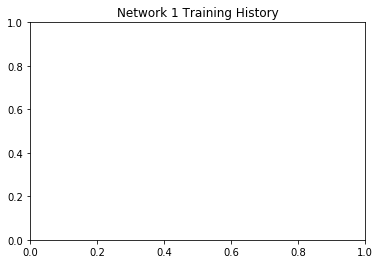

In [15]:
plt.title('Network 1 Training History')
show_history(train_history)

In [16]:
def random_test_prediction(model, i=None):
    i = np.random.randint(0, len(X_test)) if i is None else i

    pred = model.predict(np.array([X_test[i]]))

    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')

    np.set_printoptions(precision=3, suppress=True)
    print('index:', i)

    print('prediction output:', pred)

    print('true class:', classes[y_test[i]])
    print('predicted class:', classes[np.argmax(pred)])
    print('confidence:', pred.max())

In [ ]:
random_test_prediction(qd_model)

In [339]:
qd_model.save('models/net1.h5')

In [17]:
del qd_model

## Network 2: More Neurons
For the next network we'll add more neurons to our one layer.

This should be able to better fit our data as we saw before.

In [347]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation

qd_model = Sequential([
    Dense(32, input_shape=(784,), activation='sigmoid'),
    Dense(len(classes), activation='softmax'),
])

qd_model.compile(optimizer='adam', 
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

qd_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_81 (Dense)             (None, 15)                495       
Total params: 25,615
Trainable params: 25,615
Non-trainable params: 0
_________________________________________________________________


In [348]:
train_history = train_net(qd_model, X_train, y_train, 200, 0.025)

epoch: 0
Epoch 1/1
15000/15000 [==============================] - 3s 173us/step - loss: 2.2375 - acc: 0.3343
epoch: 1
Epoch 1/1
15000/15000 [==============================] - 1s 43us/step - loss: 1.6747 - acc: 0.5209
epoch: 2
Epoch 1/1
15000/15000 [==============================] - 1s 44us/step - loss: 1.4898 - acc: 0.5701
epoch: 3
Epoch 1/1
15000/15000 [==============================] - 1s 44us/step - loss: 1.3759 - acc: 0.6003
epoch: 4
Epoch 1/1
15000/15000 [==============================] - 1s 44us/step - loss: 1.3709 - acc: 0.5946
epoch: 5
Epoch 1/1
15000/15000 [==============================] - 1s 44us/step - loss: 1.2784 - acc: 0.6177
epoch: 6
Epoch 1/1
15000/15000 [==============================] - 1s 44us/step - loss: 1.2757 - acc: 0.6195
epoch: 7
Epoch 1/1
15000/15000 [==============================] - 1s 47us/step - loss: 1.2401 - acc: 0.6268
epoch: 8
Epoch 1/1
15000/15000 [==============================] - 1s 45us/step - loss: 1.2588 - acc: 0.6259
epoch: 9
Epoch 1/1
15000/15

15000/15000 [==============================] - 3s 180us/step - loss: 1.0123 - acc: 0.7027
epoch: 150
Epoch 1/1
15000/15000 [==============================] - 3s 181us/step - loss: 1.0088 - acc: 0.7102
epoch: 151
Epoch 1/1
15000/15000 [==============================] - 3s 186us/step - loss: 0.9803 - acc: 0.7150
epoch: 152
Epoch 1/1
15000/15000 [==============================] - 3s 180us/step - loss: 1.0052 - acc: 0.7053
epoch: 153
Epoch 1/1
15000/15000 [==============================] - 2s 145us/step - loss: 0.9658 - acc: 0.7081
epoch: 154
Epoch 1/1
15000/15000 [==============================] - 1s 60us/step - loss: 0.9663 - acc: 0.7123
epoch: 155
Epoch 1/1
15000/15000 [==============================] - 1s 72us/step - loss: 0.9933 - acc: 0.7070
epoch: 156
Epoch 1/1
15000/15000 [==============================] - 1s 74us/step - loss: 1.0015 - acc: 0.7031
epoch: 157
Epoch 1/1
15000/15000 [==============================] - 1s 69us/step - loss: 1.0012 - acc: 0.7061
epoch: 158
Epoch 1/1
15000

In [349]:
evaluate_model(qd_model, X_test, y_test)

150000/150000 [==============================] - 4s 26us/step
loss: 0.9546858398056031
accuracy: 0.72036


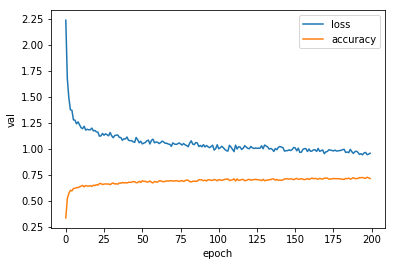

In [350]:
show_history(train_history)

index: 41726
prediction output: [[0.005 0.022 0.293 0.111 0.004 0.091 0.023 0.057 0.201 0.003 0.046 0.006
  0.029 0.005 0.104]]
true class: campfire
predicted class: campfire
confidence: 0.29325217


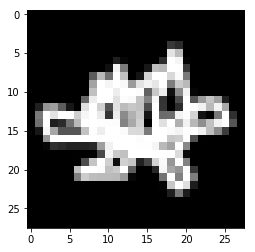

In [360]:
random_test_prediction(qd_model)

In [361]:
qd_model.save('models/net2.h5')

## Network 3: More Layers and Neurons
Next we'll add more layers AND neurons.

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation

qd_model = Sequential([
    Dense(128, input_shape=(784,), activation='sigmoid'),
    Dense(128, activation='sigmoid'),
    Dense(128, activation='sigmoid'),
    Dense(len(classes), activation='softmax'),
])

qd_model.compile(optimizer='adam', 
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

qd_model.summary()

NameError: name 'classes' is not defined

In [363]:
train_history = train_net(qd_model, X_train, y_train, 200, 0.025)

epoch: 0
Epoch 1/1
15000/15000 [==============================] - 4s 294us/step - loss: 1.9719 - acc: 0.3943
epoch: 1
Epoch 1/1
15000/15000 [==============================] - 2s 125us/step - loss: 1.3385 - acc: 0.5890
epoch: 2
Epoch 1/1
15000/15000 [==============================] - 2s 129us/step - loss: 1.2594 - acc: 0.6053
epoch: 3
Epoch 1/1
15000/15000 [==============================] - 2s 127us/step - loss: 1.2073 - acc: 0.6299
epoch: 4
Epoch 1/1
15000/15000 [==============================] - 2s 118us/step - loss: 1.1843 - acc: 0.6257
epoch: 5
Epoch 1/1
15000/15000 [==============================] - 2s 119us/step - loss: 1.1701 - acc: 0.6408
epoch: 6
Epoch 1/1
15000/15000 [==============================] - 2s 120us/step - loss: 1.1361 - acc: 0.6520
epoch: 7
Epoch 1/1
15000/15000 [==============================] - 2s 114us/step - loss: 1.1384 - acc: 0.6488
epoch: 8
Epoch 1/1
15000/15000 [==============================] - 2s 115us/step - loss: 1.0771 - acc: 0.6682
epoch: 9
Epoch 1/1


15000/15000 [==============================] - 2s 128us/step - loss: 0.7318 - acc: 0.7771
epoch: 149
Epoch 1/1
15000/15000 [==============================] - 2s 118us/step - loss: 0.7418 - acc: 0.7763
epoch: 150
Epoch 1/1
15000/15000 [==============================] - 2s 118us/step - loss: 0.7256 - acc: 0.7813
epoch: 151
Epoch 1/1
15000/15000 [==============================] - 2s 107us/step - loss: 0.7599 - acc: 0.7717
epoch: 152
Epoch 1/1
15000/15000 [==============================] - 2s 110us/step - loss: 0.7341 - acc: 0.7720
epoch: 153
Epoch 1/1
15000/15000 [==============================] - 2s 106us/step - loss: 0.7309 - acc: 0.7766
epoch: 154
Epoch 1/1
15000/15000 [==============================] - 2s 115us/step - loss: 0.7366 - acc: 0.7757
epoch: 155
Epoch 1/1
15000/15000 [==============================] - 2s 122us/step - loss: 0.7325 - acc: 0.7759
epoch: 156
Epoch 1/1
15000/15000 [==============================] - 2s 111us/step - loss: 0.7221 - acc: 0.7787
epoch: 157
Epoch 1/1
1

In [364]:
evaluate_model(qd_model, X_test, y_test)

150000/150000 [==============================] - 10s 69us/step
loss: 0.7184748692131042
accuracy: 0.7830666666666667


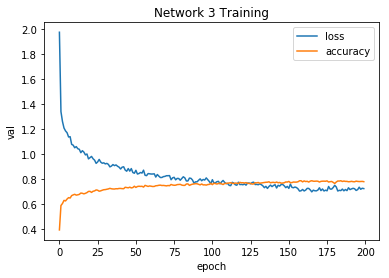

In [384]:
plt.title('Network 3 Training')
show_history(train_history)

index: 114192
prediction output: [[0.    0.038 0.    0.    0.    0.001 0.001 0.    0.007 0.    0.    0.
  0.941 0.01  0.   ]]
true class: map
predicted class: map
confidence: 0.9410469


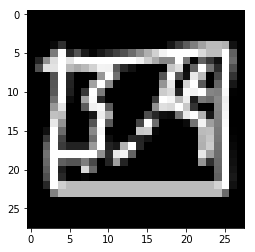

In [382]:
random_test_prediction(qd_model)

In [305]:
qd_model.save('models/net3.h5')

## Network 4: More Layers and Neurons
Next we'll add more layers AND neurons.

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation

qd_model = Sequential([
    Dense(128, input_shape=(784,), activation=tf.nn.sigmoid),
    Dense(256, activation=tf.nn.sigmoid),
    Dense(256, activation=tf.nn.sigmoid),
    Dense(128, activation=tf.nn.sigmoid),
    Dense(len(classes), activation='softmax'),
])

qd_model.compile(optimizer='adam', 
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

qd_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_41 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_42 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_43 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_44 (Dense)             (None, 15)                1935      
Total params: 234,127
Trainable params: 234,127
Non-trainable params: 0
_________________________________________________________________


In [68]:
train_history = train_net(qd_model, X_train, y_train, 40, 1)

epoch: 0
Epoch 1/1
600000/600000 [==============================] - 55s 91us/step - loss: 1.0679 - acc: 0.6636
epoch: 1
Epoch 1/1
600000/600000 [==============================] - 56s 94us/step - loss: 0.8361 - acc: 0.7425
epoch: 2
Epoch 1/1
600000/600000 [==============================] - 57s 95us/step - loss: 0.7629 - acc: 0.7659
epoch: 3
Epoch 1/1
600000/600000 [==============================] - 78s 129us/step - loss: 0.7289 - acc: 0.7764
epoch: 4
Epoch 1/1
600000/600000 [==============================] - 57s 94us/step - loss: 0.6875 - acc: 0.7897
epoch: 5
Epoch 1/1
600000/600000 [==============================] - 59s 98us/step - loss: 0.6654 - acc: 0.7967
epoch: 6
Epoch 1/1
600000/600000 [==============================] - 58s 96us/step - loss: 0.6565 - acc: 0.7986
epoch: 7
Epoch 1/1
600000/600000 [==============================] - 66s 109us/step - loss: 0.6447 - acc: 0.8025
epoch: 8
Epoch 1/1
600000/600000 [==============================] - 70s 117us/step - loss: 0.6255 - acc: 0.808

In [69]:
evaluate_model(qd_model, X_test, y_test)

150000/150000 [==============================] - 13s 86us/step
loss: 0.556426857919693
accuracy: 0.83314


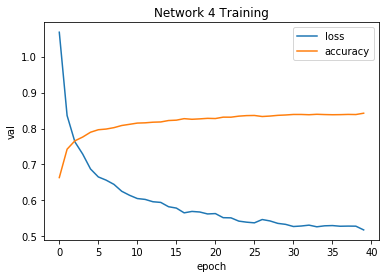

In [70]:
plt.title('Network 4 Training')
show_history(train_history)

index: 91497
prediction output: [[0.001 0.001 0.986 0.002 0.    0.001 0.001 0.002 0.    0.003 0.001 0.001
  0.    0.    0.001]]
true class: campfire
predicted class: campfire
confidence: 0.9858849


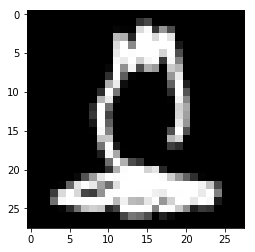

In [71]:
random_test_prediction(qd_model)

In [72]:
qd_model.save('models/net4.h5')